# Ch4. 딥러닝 시작

## 4.1 인공 신경망의 한계와 딥러닝 출현
- 인공 신경망 구조: 퍼셉트론(선형 분류기), 신경망(딥러닝) 기원 알고리즘
  - 퍼셉트론 원리: 다수의 신호를 입력받아 하나의 신호를 출력
  - AND 게이트: 모든 입력이 '1'일 때 작동. 어떤 하나라도 '0'이면 멈춤.
  - OR 게이트: 입력에서 둘 중 하나만 '1'이거나 둘 다 '1'일 때 작동
  - XOR 게이트: 배타적 논리합이라는 용어. 입력 두 개 중 한 개만 '1'일 때 작동하는 논리 연산
  

## 4.2 딥러닝 구조
딥러닝: 여러 층을 가진 인공 신경망을 사용해 학습을 수행하는 것

### 4.2.1 딥러닝 용어
- 입력층: 데이터를 받아들이는 층
- 은닉층: 모든 입력 노드부터 입력 값을 받아 가중합을 계산하고, 이 값을 활성화 함수에 적용해 출력층에 전달하는 층 (두 개 이상)
- 출력층: 신경망의 최종 결괏값이 포함된 층
- 가중치(weight): 노드와 노드 간 연결 강도
- 바이어스(bias): 가중합에 더해 주는 상수, 하나의 뉴런에서 활성화 함수를 거쳐 최종적으로 출력되는 값을 조절하는 역할
- 가중합(weighted sum), 전달 함수: 가중치와 신호의 곱을 합한 것
- 함수
  - 활성화 함수(activation function): 신호를 입력받아 이를 적절히 처리해 출력해 주는 함수
    - sigmoid function, tanh function, RELU funtion, Leaky RELU, Softmax function
  - 손실 함수(loss function): 가중치 학습을 위해 출력 함수의 결과와 실제 값 간의 오차를 측정하는 함수
    - MSE, Cross-Entropy Error

In [1]:
import torch

In [2]:
# 소프트맥스 함수
# 입력 값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함.
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
    self.relu = torch.nn.ReLu(inplace=True)
    self.out = torch.nn.Linear(n_hidden, n_output) # 출력층
    self.softmax = torch.nn.Softmax(dim=n_output)
  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x) # 은닉층을 위한 렐루 활성화 함수
    x = self.out(x)
    x = self.softmax(x) # 출력층을 위한 소프트맥스 활성화 함수
    return x

In [ ]:
# 평균 제곱 오차
# 실제 값과 예측 값의 차이를 제곱해 평균 낸 것
# loss_fn = torch.nn.MSELoss(reduction='sum')
# y_pred = model(x)
# loss = loss_fn(y_pred, y)

In [ ]:
# 크로스 엔트로피 오차
# 분류 문제에서 원-핫 인코딩했을 떄 사용할 수 있는 오차 계산법
# loss = nn.CrossEntropy()
# input = torch.randn(5, 6, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

### 4.2.2 딥러닝 학습
- 순전파, 역전파 두 단계로 진행
 1. 순전파(feedforward): 네트워크에 훈련 데이터가 들어올 때 발생.

  데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 지나감.
  
  모든 뉴런이 이전 층의 뉴런에서 수신한 정보에 변환(가중합 및 활성화 함수)을 적용해 다음 층(은닉층)의 뉴런으로 전송하는 방식

 2. 역전파(backpropagation): 손실(오차)이 계산되면 그 정보는 역으로 전파(출력층 →. 은닉층 → 입력층).

  모든 뉴런에 대해 진행하여 계산된 각 뉴런 결과를 다시 순전파 가중치 값으로 사용.

### 4.2.3 딥러닝의 문제점과 해결 방안
- 과적합(Overfitting): 훈련 데이터를 과하게 학습해 발생.
- 해결책) 드롭아웃(dropout): 학습 과정 중 임의로 일부 노드들을 학습에서 제외시킴.

- 기울기 소멸(Vanishing Gradient): 출력층에서 은닉층으로 전달되는 오차가 크게 줄어 학습이 되지 않는 현상
- 해결책) 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수 사용

- 성능이 나빠짐: 경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복
- 해결책) **배치 경사 하강법**(전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법), **확률적 경사 하강법**(임의로 선택한 데이터에 대해 기울기를 계산하는 방법으로 적은 데이터를 사용하므로 빠른 계산 가능), **미니 배치 경사 하강법**(전체 데이터셋을 미니 배치 여러 개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용해 모델을 업데이트해 학습하는 방법)

In [3]:
# 드롭아웃 구현 코드
class DropoutModel(torch.nn.Module):
  def __init__(self):
    super(DropoutModel, self).__init__()
    self.layer1 = torch.nn.Linear(784, 1200)
    self.dropout1 = torch.nn.Dropout(0.5)
    self.layer2 = torch.nn.Linear(1200, 1200)
    self.dropout2 = torch.nn.Dropout(0.5)
    self.layer3 = torch.nn.Linear(1200, 10)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x)

In [ ]:
# 확률적 경사 하강법과 미니 배치 경사 하강법
# class CustomDataset(Dataset):
#   def __init__(self):
#     self.x_data = [[1,2,3],[4,5,6],[7,8,9]]
#     self.y_data = [[12],[18],[11]]
#     def __len__(self):
#       return len(self.x_data)
#     def __getitem__(self, idx):
#       x = torch.FloatTensor(self.x_data[idx])
#       y = torch.FloatTensor(self.y_data[idx])
#       return x, y
# dataset = CustomDataset()
# dataloader = DataLoader(
#     dataset,
#     batch_size=2,
#     shuffle=True
# )

### 옵티마이저(optimizer)
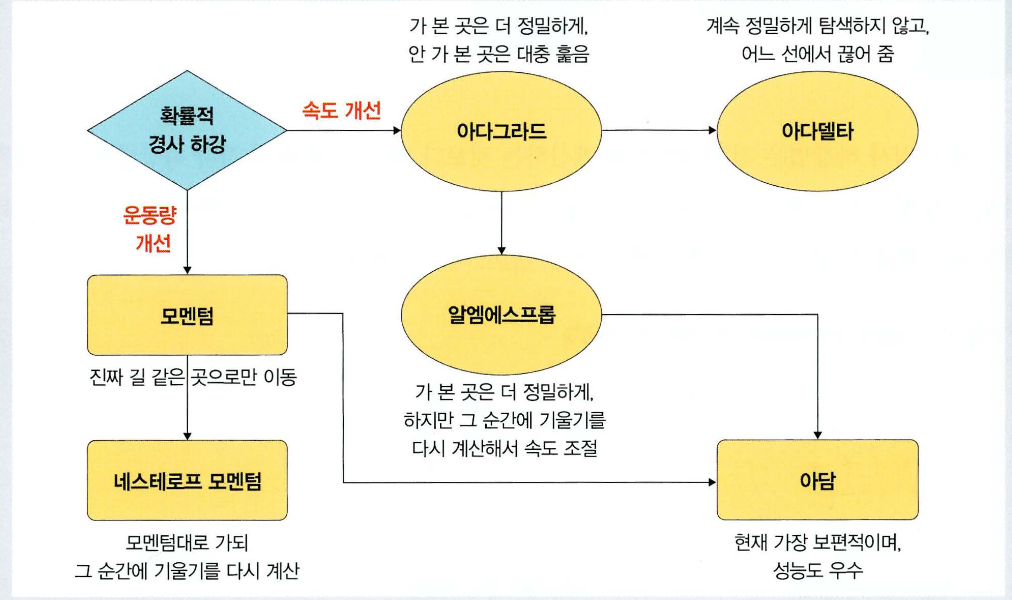
확률적 경사 하강법의 파라미터 변경 폭이 불안정한 문제를 해결하기 위해 학습 속도와 운동량을 조정하는 방법

- 속도를 조정하는 방법: 아다그라드(Adagrad), 아다델타(Adadelta), 알엠에스프롬(RMSProp)

- 운동량을 조정하는 방법: 모멘텀(Momentum), 네스테로프 모멘텀(Nesterov Accelerated Gradient)

- 속도와 운동량에 대한 혼용 방법: 아담(Adam)

### 4.2.4 딥러닝 사용할 때 이점
- 특성 추출(feature extraction): 데이터별로 어떤 특징을 가지고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업
- 빅데이터 효율적 활용: 딥러닝에서 특성 추출을 알고리즘에 통합시켰다고 했는데, 이것이 가능한 이유는 빅데이터 떄문.

## 4.3 딥러닝 알고리즘
- 심층 신경망을 사용
- 목적에 따라 합성곱 신경망(CNN), 순환 신경망(RNN), 제한된 볼츠만 머신(RBM), 심층 신뢰 신경망(DBN)으로 분류

### 4.3.1 심층 신경망(DLL)
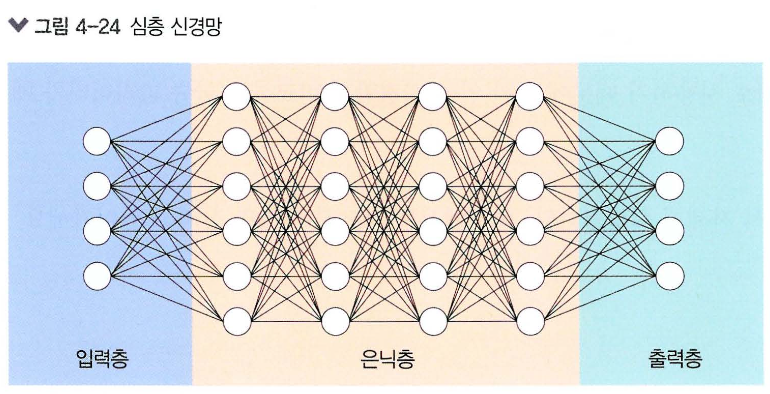
- 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망
  - ML에서 비선형 분류를 하기 위해 여러 트릭을 사용, 하지만 심층 신경망은 다수의 은닉층을 추가했기 때문에 별도의 트릭 없이 비선형 분류 가능
  - 다양한 비선형적 관계 학습 가능
  - 학습을 위한 연산량 많고, 기울기 소멸 문제 등 발생
  -> 드롭아웃, 렐루 함수, 배치 정규화 등 적용

### 4.3.2 합성곱 신경망(Convolutional Neural Network, CNN)
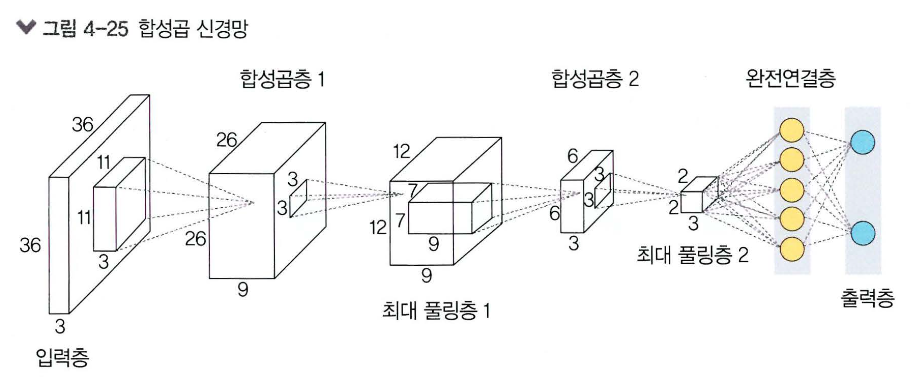
- 합성곱층(convolutional layer)과 풀링층(pooling layer)을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
  - 이미지에서 객체, 얼굴, 장면을 인식하기 위해 패턴을 찾는 데 특히 유용
  - Eg: LeNet-5, AlexNet
  - 층을 더 깊게 쌓은 신경망: VGG, GoogLeNet, ResNet
  - 각 층의 입출력 형상을 유지
  - 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식
  - 복수 필터로 이미지의 특징을 추출해 학습
  - 추출한 이미지의 특징을 모으고 강화하는 풀링층 존재
  - 필터를 공유 파라미터로 사용하기 때문에 인공 신경망과 비교해 학습 파라미터가 매우 적음

### 4.3.3 순환 신경망(Recurrent Neural Network, RNN)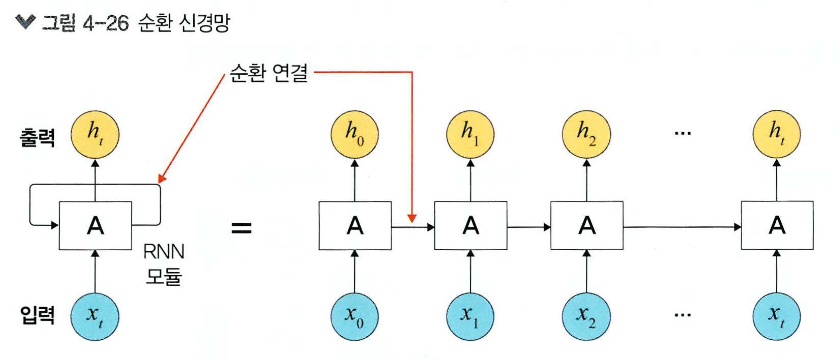

- 시계열 데이터(음악, 영상 등) 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망
  - 시간성을 가진 데이터가 많음
  - 시간성 정보를 이용해 데이터의 특징을 잘 다룸
  - 시간에 따라 내용이 변하므로 데이터는 동적이고, 길이가 가변적
  - 매우 긴 데이터를 처리하는 연구가 활발히 진행됨
  - 기울기 소멸 문제로 학습이 제대로 되지 않는 문제가 있음
  -> 이를 해결하고자 메모리 개념을 도입한 LSTM(Long-Short Term Memory)이 순환 신경망에서 많이 사용됨

### 4.3.4 제한된 볼츠만 머신
- 볼츠만 머신은 가시층과 은닉층으로 구성된 모델, 이 모델에서 가시층은 은닉층과만 연결되는데 이것이 제한된 볼츠만 머신
  - 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용
  - 기울기 소멸 문제를 해결하기 위해 사전 학습 용도로 활용 가능
  - 심층 신뢰 신경망(DBN)의 요소로 활용

### 4.3.5 심층 신뢰 신경망(Deep Belief Network, DBN)
- 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망
  1. 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련
  2. 첫 번째 층 입력 데이터와 파라미터를 고정해 두 번째 층 제한된 볼츠만 머신을 사전 훈련
  3. 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아 올려 전체 DBN을 완성